In [2]:
library(Seurat)
library(dplyr)
library(patchwork)
library(RColorBrewer)
library(wesanderson)
library(ggplot2)

In [3]:
nuclei <- readRDS("full_nuclei.rds")
#islolate MSNs
isolatedMSNs <- subset(nuclei, idents = 'MSNs')
#get rid of poor quality cells
msns <- subset(isolatedMSNs, subset = nFeature_RNA > 200 & nFeature_RNA > 2500)

In [4]:
#redo PCA
msns <- FindVariableFeatures(object = msns)
msns <- RunPCA(msns, features = VariableFeatures(object = msns))

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
“number of items to replace is not a multiple of replacement length”
PC_ 1 
Positive:  PRKCA, ABLIM1, MIR99AHG, QKI, PRKG1, CDH20, LUZP2, TCF4, NFIA, FARP1 
	   TRPM3, GPM6A, GPC6, PDZRN4, TMTC2, MAP4K4, LRP1B, USP54, NPAS3, C1orf61 
	   SPARCL1, CARMIL1, SLC1A3, C1orf21, SLC1A2, MGAT4C, FCHSD2, CAMK2G, NFIB, DOCK1 
Negative:  PDE1B, ADCY5, SLIT3, NGEF, SLC35F3, RYR3, PHACTR1, PPP1R16B, DGKI, ANO3 
	   INPP5A, PRKCB, CA12, PPP2R2C, AC005906.2, CACNA2D3, MCTP1, SMOC2, PDE10A, PDZD2 
	   PTPN5, KANK4, ATP2B1, GNG7, KIAA1211L, ACTN1, MME, ITPR1, CAMK4, RBFOX1 
PC_ 2 
Positive:  FOXP2, TIAM1, PDE1A, NKAIN2, MYO16, TENM1, GALNTL6, SEZ6L, ZNF804B, RBM20 
	   KCNJ3, KCNIP

In [5]:
#redo umap
msns <- FindNeighbors(msns, dims = 1:15)
msns <- RunUMAP(msns, dims = 1:15)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
00:17:47 UMAP embedding parameters a = 0.9922 b = 1.112

00:17:47 Read 7451 rows and found 15 numeric columns

00:17:47 Using Annoy for neighbor search, n_neighbors = 30

00:17:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:17:48 Writing NN index file to temp file /tmp/RtmpXZqbRy/file1790e5f1dd4ff

00:17:48 Searching Annoy index using 1 thread, search_k = 3000

00:17:50 Annoy recall = 100%

00:17:50 Commencing smooth kNN distance cal

In [6]:
# the clustering parameter was optimized based on seperation of NUDAP from D1H
msns <- FindClusters(msns, resolution = 0.3)
head(Idents(msns), 5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7451
Number of edges: 275262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9386
Number of communities: 12
Elapsed time: 0 seconds


AGGAATACATGGATCT-7 CAGCCAGGTGCCGAAA-7 CATGAGTAGCCTCATA-7 ACTGTGATCATGACAC-7 
                 0                  0                  0                  6 
GCCCAGATCTGTCTCG-7 
                 0 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11

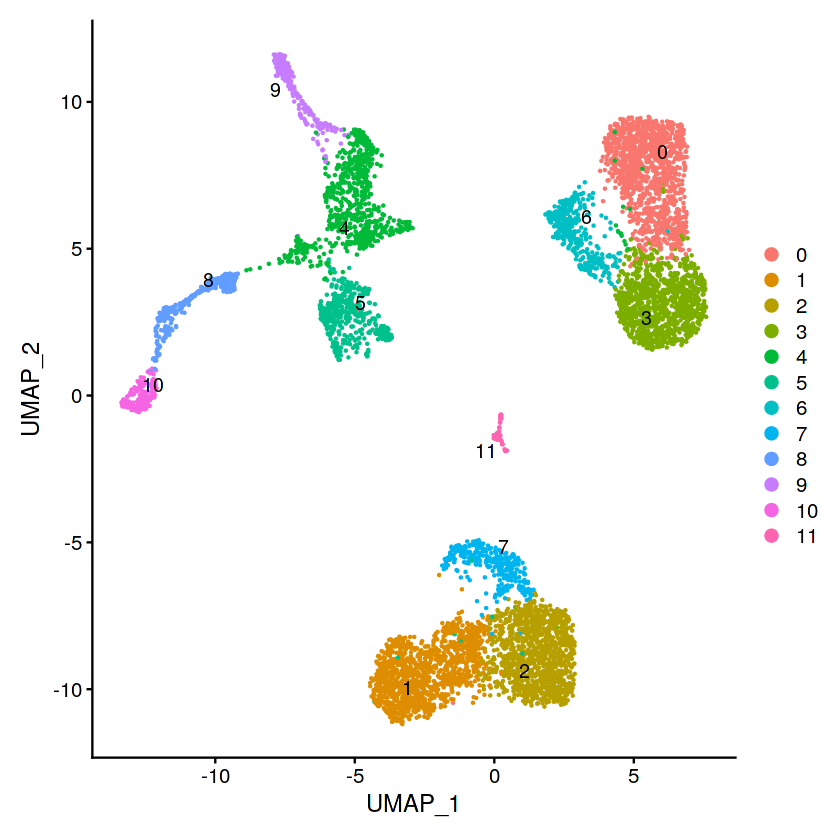

In [7]:
#ClusterPlot
DimPlot(msns, reduction = "umap", label = TRUE, repel = TRUE)

In [8]:
#We are not sure of the identity of this small cluster
msns <- SubsetData(object = msns, ident.remove = "11")

Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”


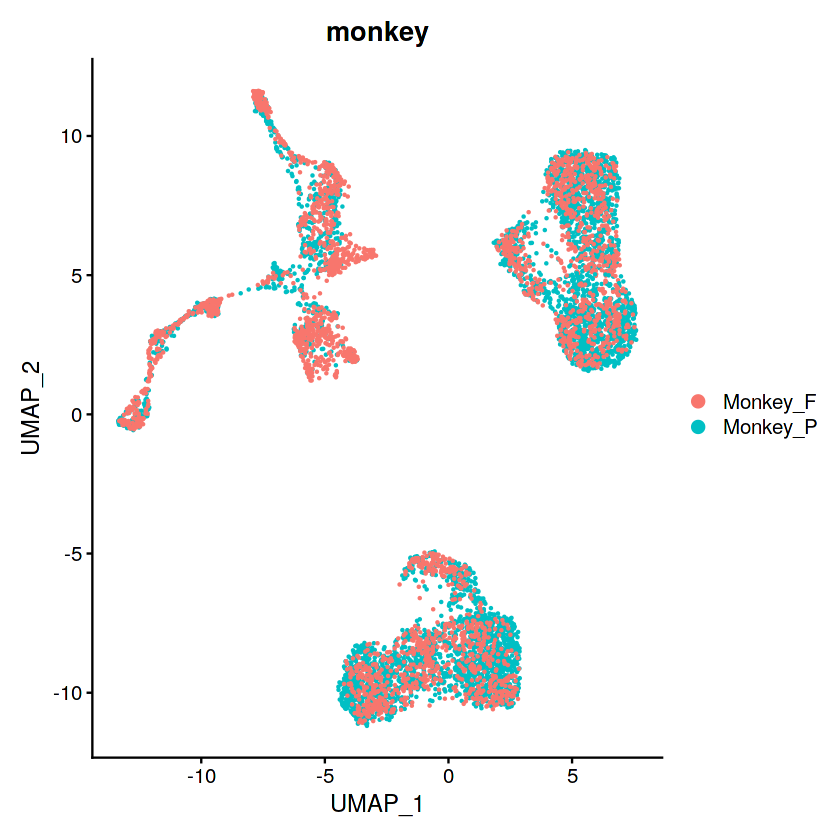

In [9]:
#AnimalPlot
DimPlot(msns, reduction = "umap", group.by = "monkey")

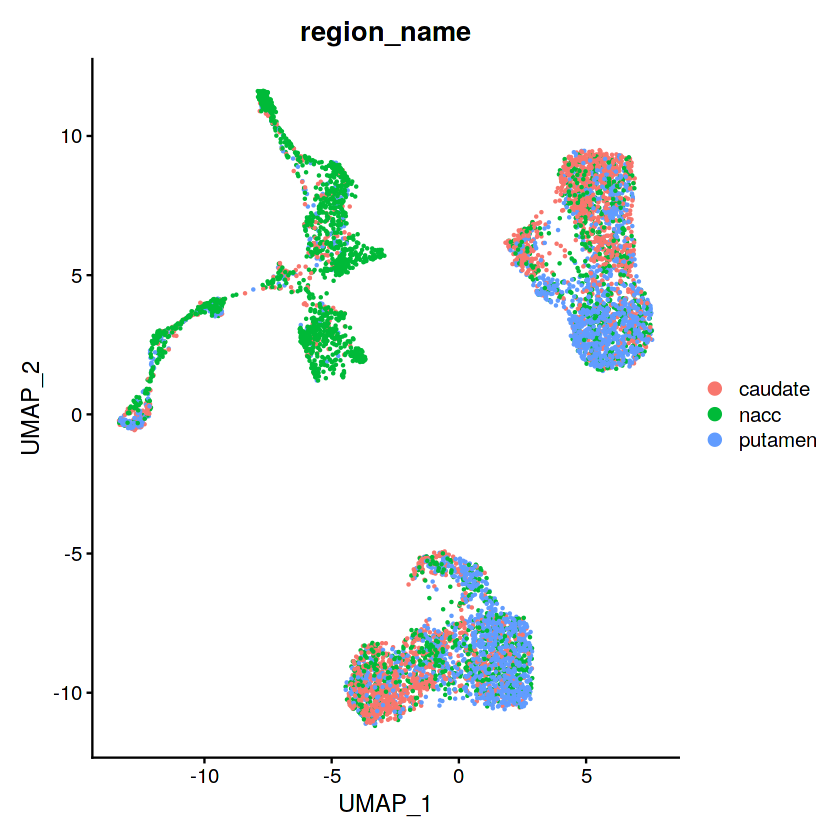

In [10]:
#RegionPlot
DimPlot(msns, reduction = "umap", group.by = "region_name")

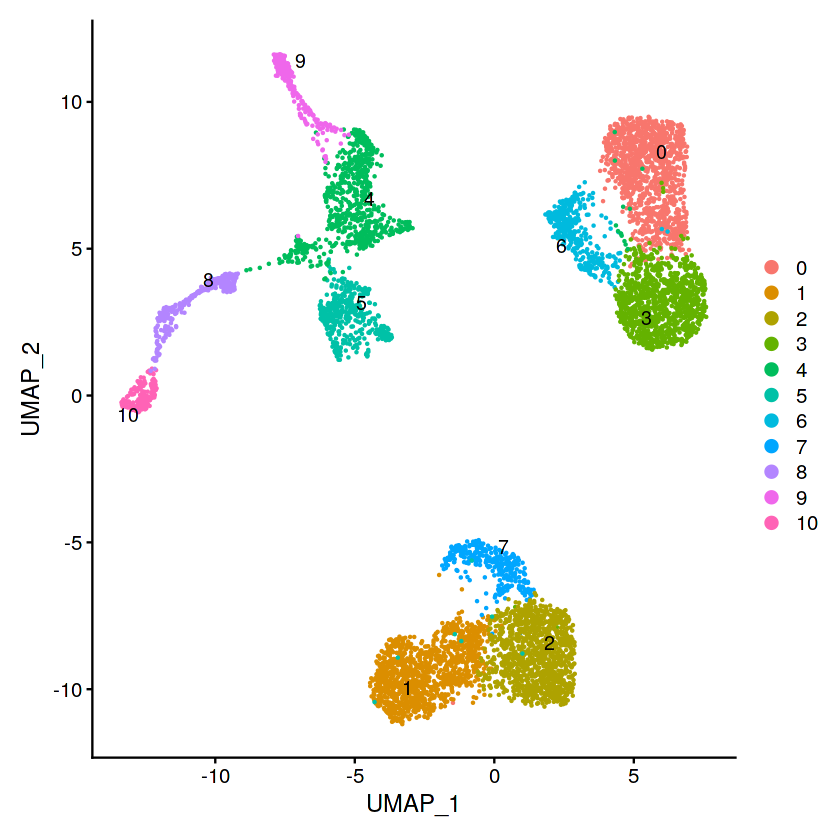

In [11]:
#ClusterPlot
DimPlot(msns, reduction = "umap", label = TRUE, repel = TRUE)

In [12]:
Idents(object = msns) <- 'integrated_snn_res.0.3'
msns <- RenameIdents(object = msns,'0' = 'D1-Matrix','1' = 'D2-Matrix','2' = 'D2-Matrix','3' = 'D1-Matrix', '6' = 'D1-Striosome','7' = 'D2-Striosome', '4' = 'D1-Shell/OT','5' = 'D2-Shell/OT','8' = 'D1-NUDAP','9' = 'D1-ICj','10' = 'D1/D2-Hybrid')
msns@meta.data$MSN_type = Idents(object = msns)

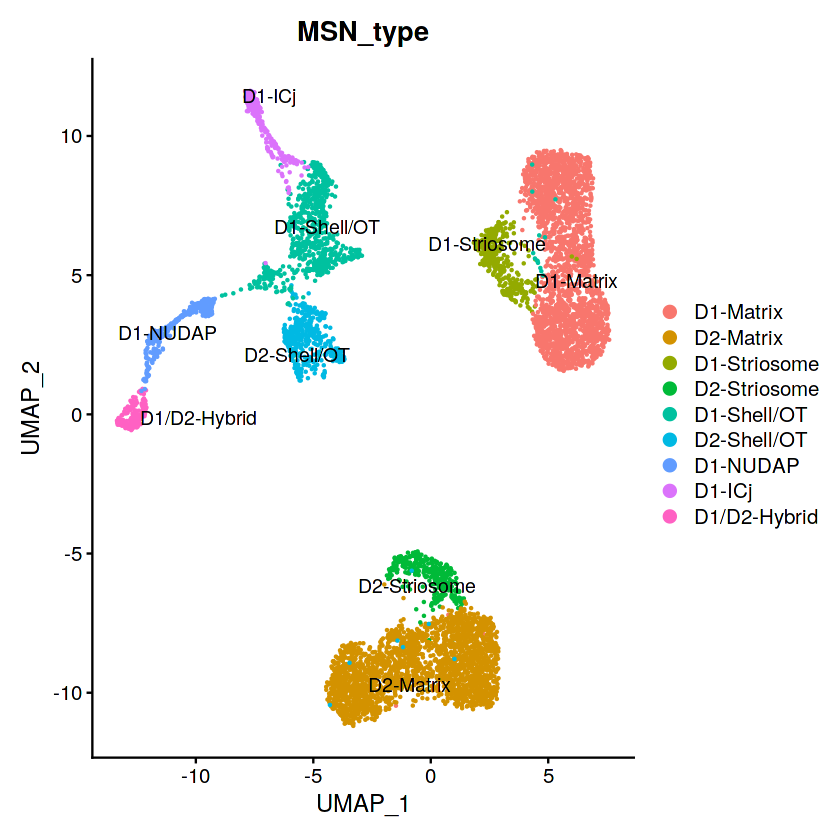

In [13]:
#ClusterPlot
DimPlot(msns,reduction = "umap",group.by = "MSN_type", label = TRUE, repel = TRUE)

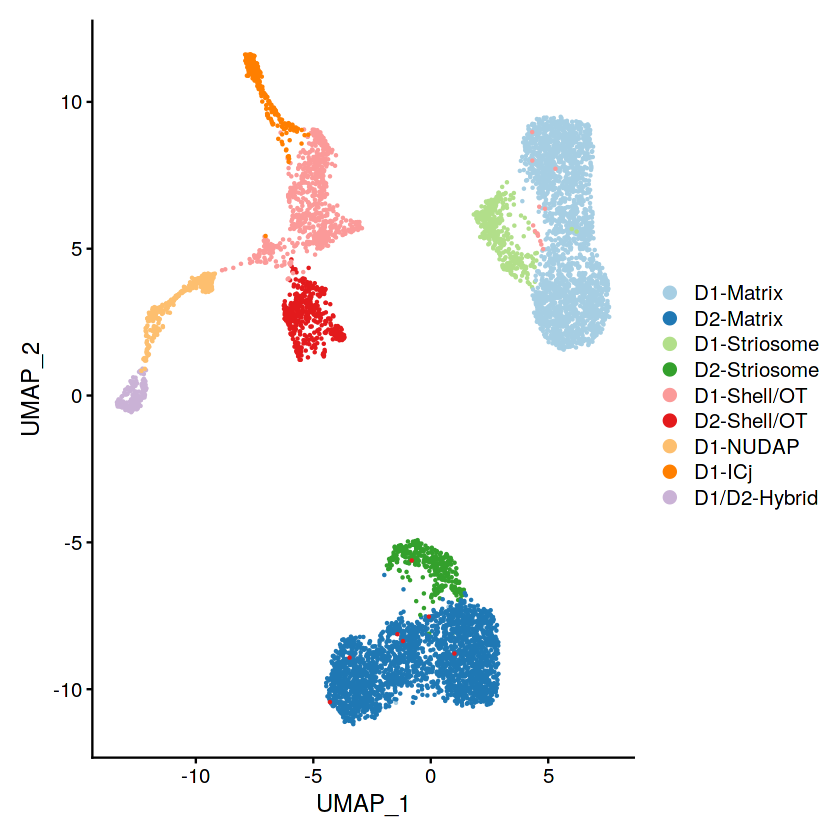

In [14]:
DimPlot(msns,reduction = "umap", cols = brewer.pal(10,"Paired"))

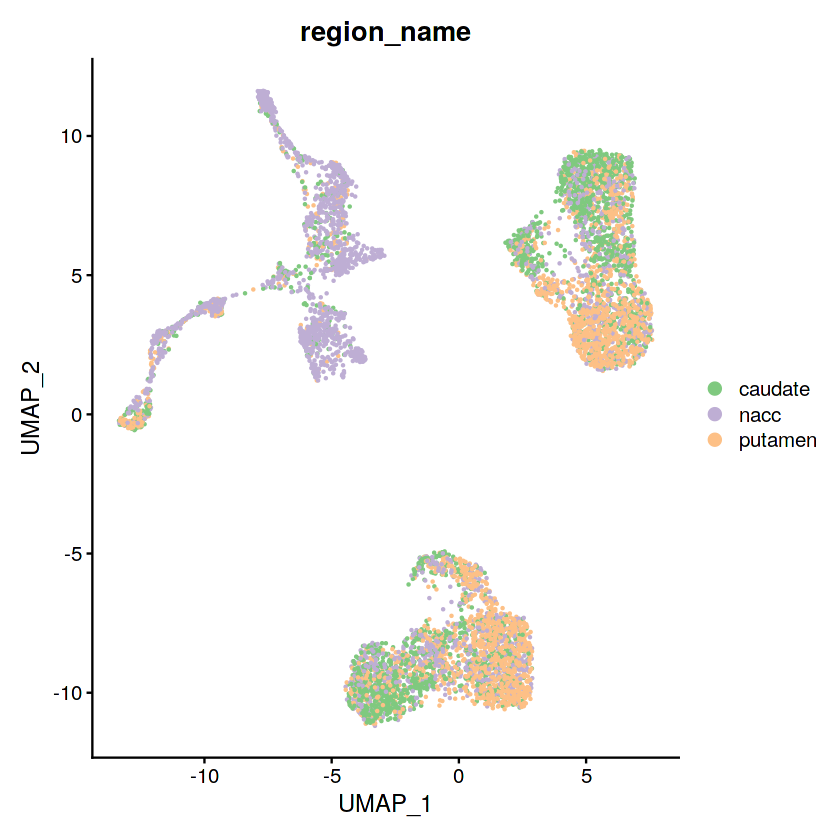

In [15]:
DimPlot(msns, group.by = "region_name", cols = brewer.pal(3,"Accent"))

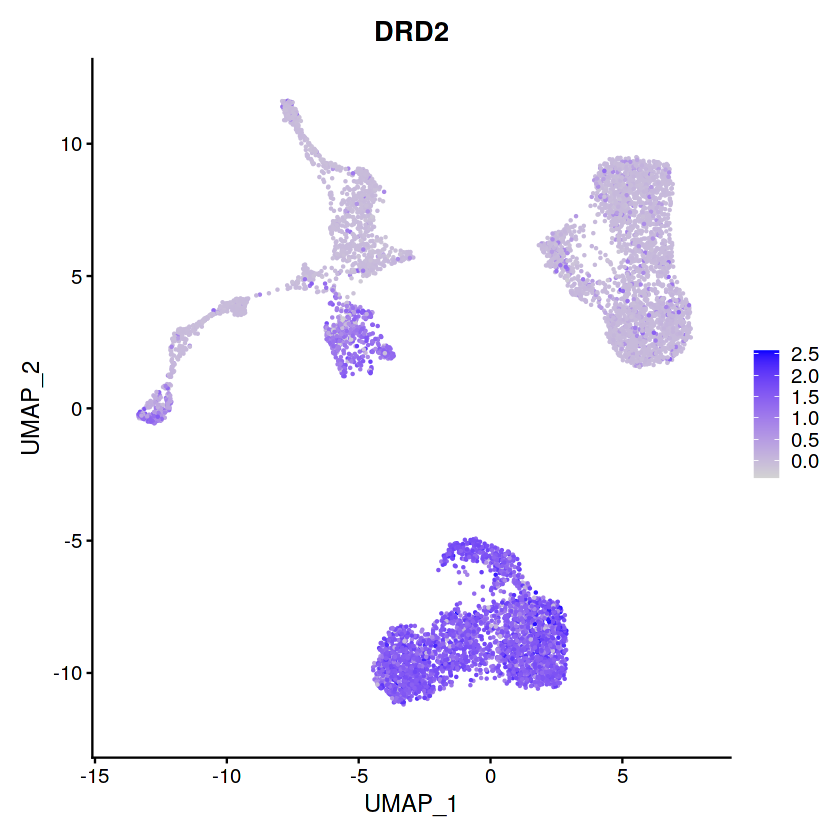

In [16]:
FeaturePlot(msns, features = c("DRD2"))+scale_fill_gradientn(colors = brewer.pal(5,"Blues")) 

Warning message:
“Could not find DRD1 in the default search locations, found in RNA assay instead”


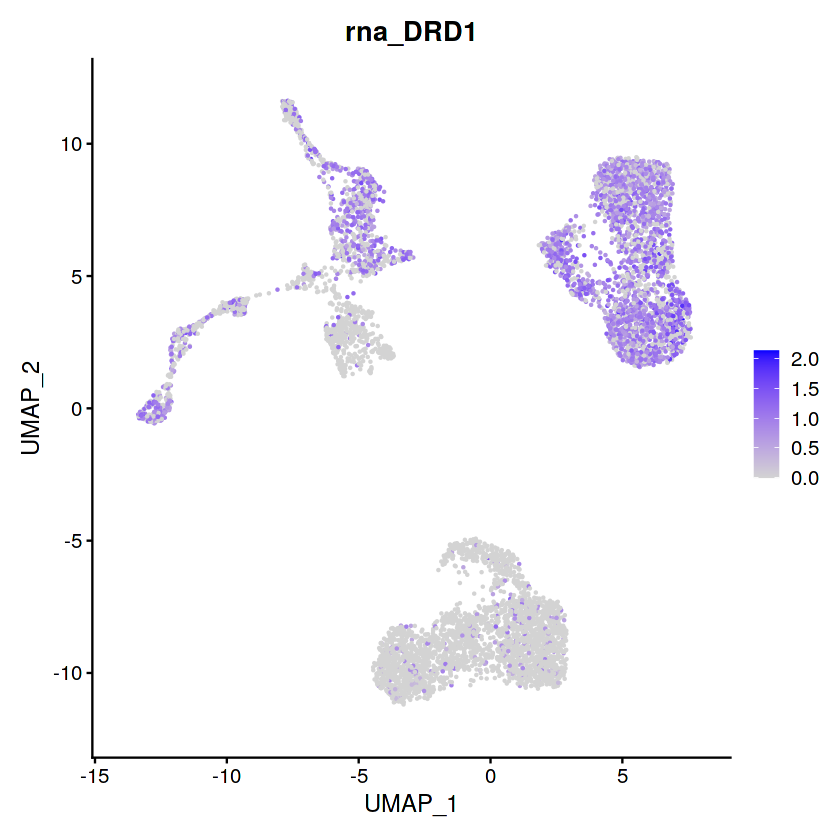

In [17]:
FeaturePlot(msns, features = c("DRD1"))+scale_fill_gradientn(colors = brewer.pal(5,"Blues")) 

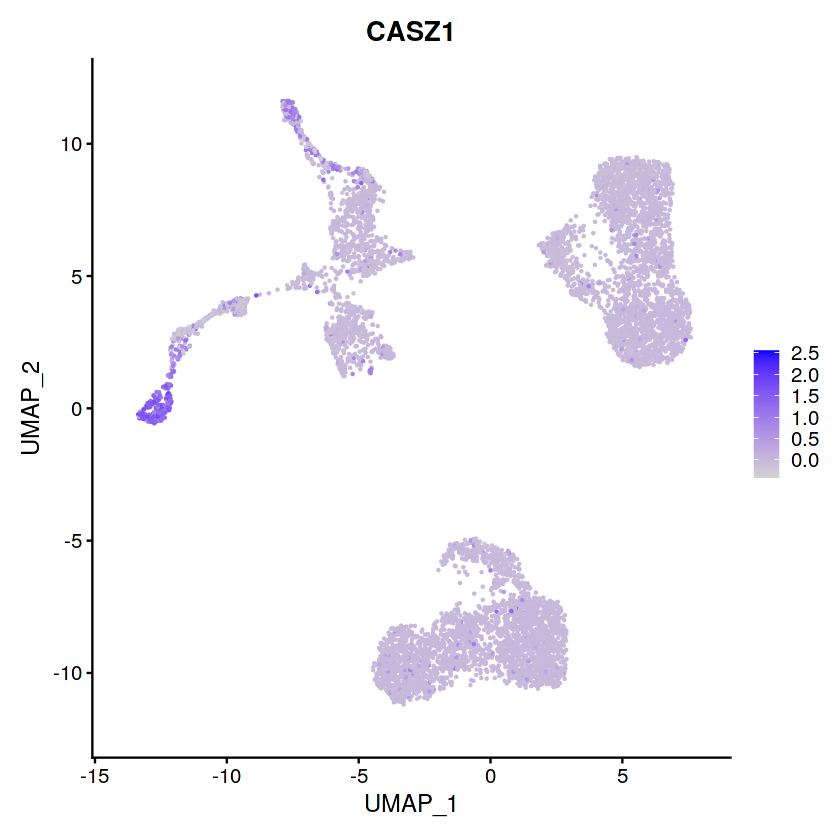

In [18]:
FeaturePlot(msns, features = c("CASZ1"))+scale_fill_gradientn(colors = brewer.pal(5,"Blues")) 

Warning message:
“Could not find DRD1 in the default search locations, found in RNA assay instead”


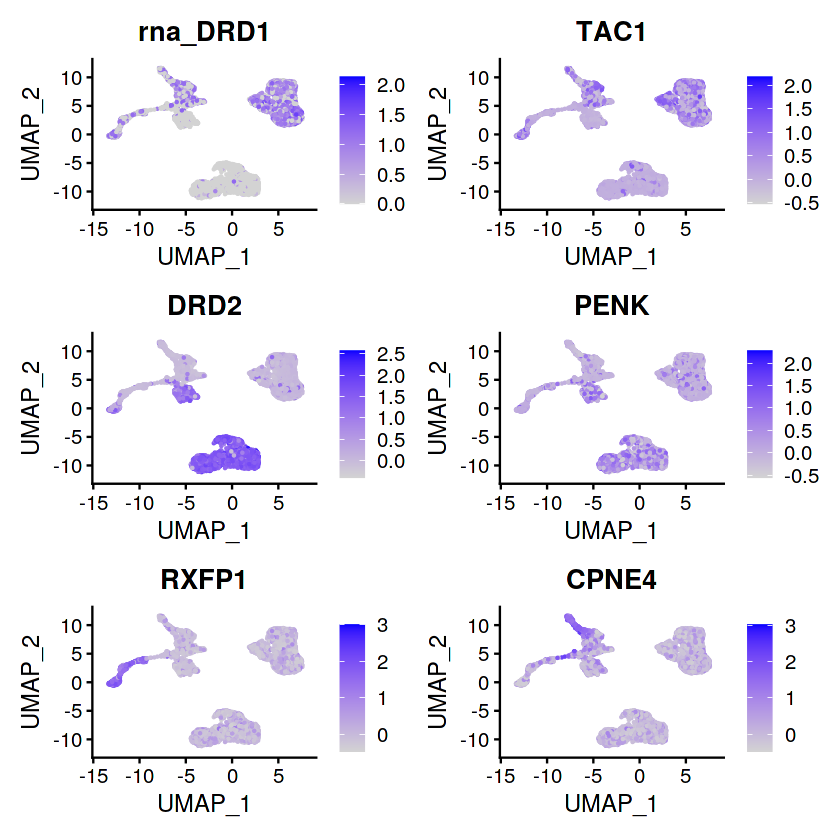

In [19]:
FeaturePlot(msns, features = c("DRD1", "TAC1","DRD2","PENK","RXFP1", "CPNE4"), blend = FALSE)+scale_fill_gradientn(colors = brewer.pal(5,"Blues")) 

Warning message:
“Could not find EPHA4 in the default search locations, found in RNA assay instead”


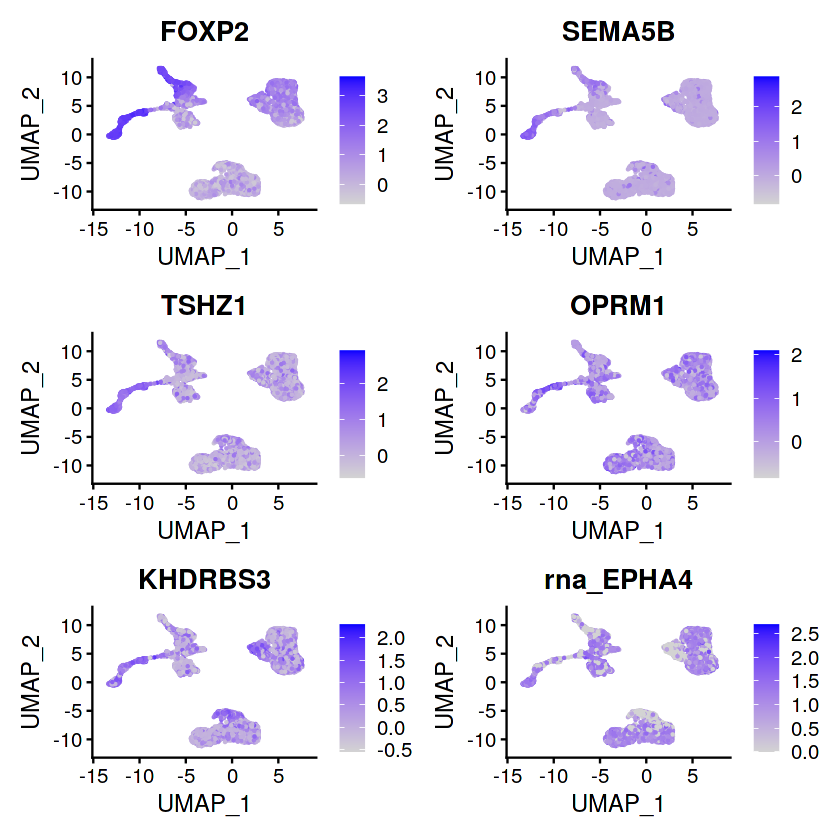

In [20]:
FeaturePlot(msns, features = c("FOXP2", "SEMA5B","TSHZ1", "OPRM1", "KHDRBS3","EPHA4"), blend = FALSE)+scale_fill_gradientn(colors = brewer.pal(5,"Blues")) 

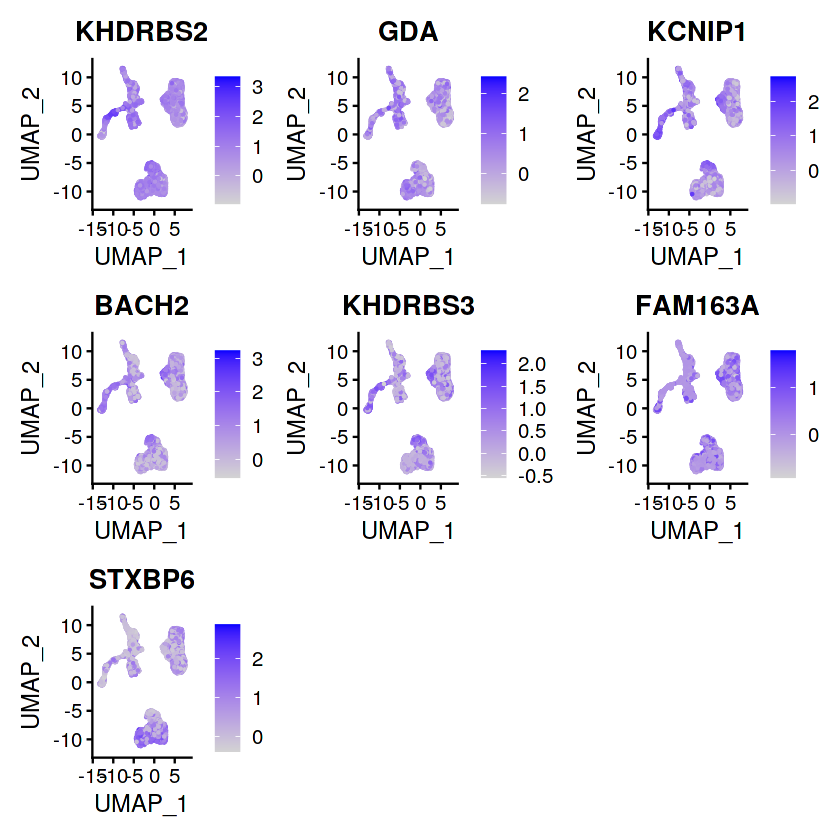

In [21]:
FeaturePlot(msns, features = c("KHDRBS2","GDA","KCNIP1","BACH2", "KHDRBS3","FAM163A","STXBP6"), blend = FALSE)+scale_fill_gradientn(colors = brewer.pal(5,"Blues")) 

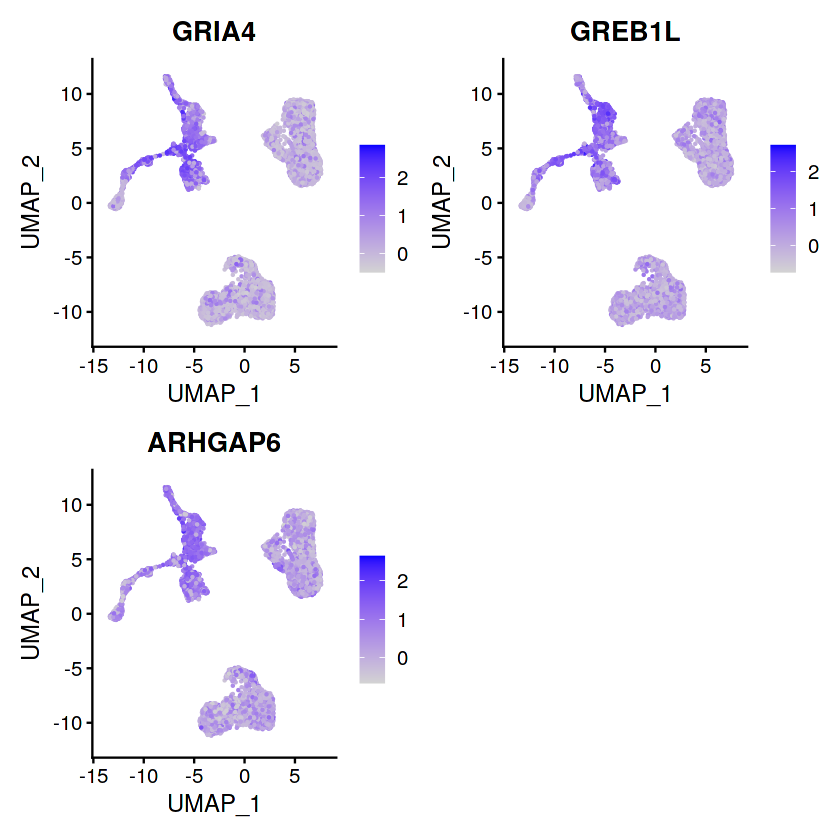

In [22]:
FeaturePlot(msns, features = c("GRIA4","GREB1L","ARHGAP6"), blend = FALSE)+scale_fill_gradientn(colors = brewer.pal(5,"Blues")) 

In [23]:
Idents(object = msns) <- 'MSN_type'
my_levels <- c('D2-Matrix','D1-Matrix','D2-Striosome','D1-Striosome','D2-Shell/OT','D1-Shell/OT','D1-ICj','D1-NUDAP','D1/D2-Hybrid')
Idents(msns) <- factor(Idents(msns), levels= my_levels)

msns.markers <- FindAllMarkers(msns, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
msns.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
top10 <- msns.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
#DoHeatmap(msns, features = top10$gene, disp.min = -2, disp.max = 2, group.colors = brewer.pal(10,"Paired")) +scale_fill_gradientn(colors = brewer.pal(9,"PuOr"))



Calculating cluster D2-Matrix

Calculating cluster D1-Matrix

Calculating cluster D2-Striosome

Calculating cluster D1-Striosome

Calculating cluster D2-Shell/OT

Calculating cluster D1-Shell/OT

Calculating cluster D1-ICj

Calculating cluster D1-NUDAP

Calculating cluster D1/D2-Hybrid



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.1173946,0.978,0.366,0.000000e+00,D2-Matrix,DRD2
0.000000e+00,0.9190488,0.997,0.748,0.000000e+00,D2-Matrix,CHRM3
0.000000e+00,0.8892666,0.970,0.425,0.000000e+00,D1-Matrix,RELN
0.000000e+00,0.8423445,0.876,0.409,0.000000e+00,D1-Matrix,EBF1
3.233310e-97,0.6968465,0.997,0.812,6.466619e-94,D2-Striosome,ADAMTS9-AS2
1.715180e-82,0.7199058,0.690,0.231,3.430359e-79,D2-Striosome,POU6F2
7.863787e-190,1.2044305,0.997,0.577,1.572757e-186,D1-Striosome,RELN
1.265693e-104,0.8514530,0.890,0.499,2.531387e-101,D1-Striosome,BACH2
2.118016e-189,1.0253236,0.991,0.648,4.236031e-186,D2-Shell/OT,MGAT4C


In [24]:
unique(msns$MSN_type)

[1] D1-Matrix    D1-Striosome D2-Matrix    D2-Striosome D1/D2-Hybrid
[6] D2-Shell/OT  D1-NUDAP     D1-Shell/OT  D1-ICj      
9 Levels: D1-Matrix D2-Matrix D1-Striosome D2-Striosome ... D1/D2-Hybrid

In [25]:
Idents(object = msns) <- 'MSN_type'
my_levels <- c('D2-Matrix','D1-Matrix','D2-Striosome','D1-Striosome','D2-Shell/OT','D1-Shell/OT','D1-ICj','D1-NUDAP','D1/D2-Hybrid')
Idents(msns) <- factor(Idents(msns), levels= my_levels)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



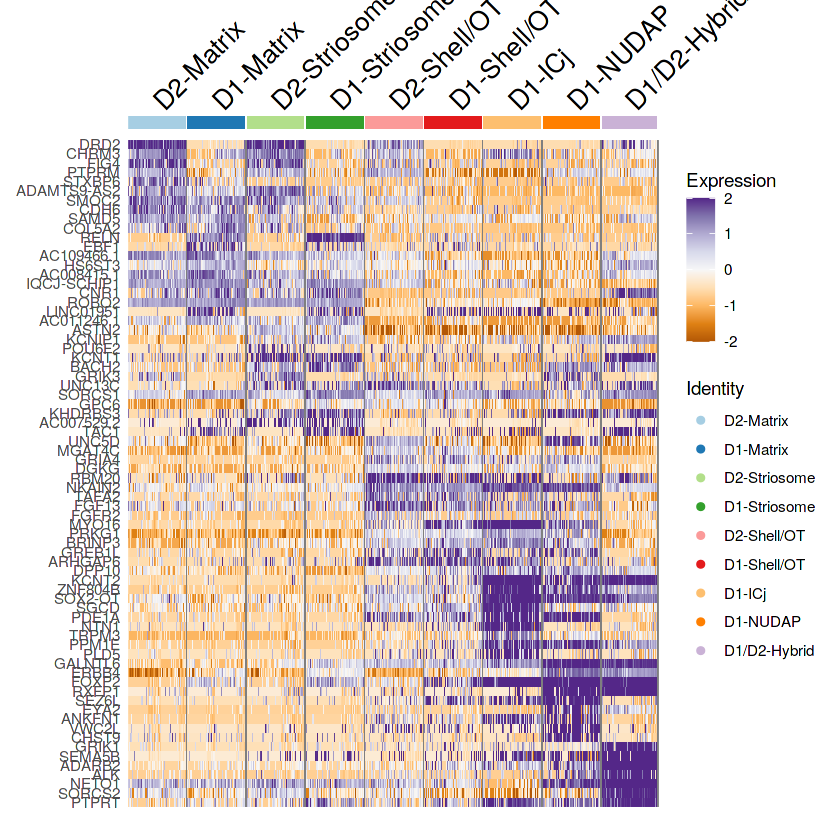

In [26]:
DoHeatmap(subset(msns, downsample = 200),features = top10$gene, disp.min = -2, disp.max = 2, group.colors = brewer.pal(10,"Paired")) +scale_fill_gradientn(colors = brewer.pal(9,"PuOr"))